In [1]:
import numpy as np
import open3d as o3d
import os
import glob
from data_understanding import read_meta_data,save_meta_data
# import pcl

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
data = np.load("all_data_building/T_315500_233500_NE_T_315500_234000_SE/building_008.npy",allow_pickle=True)

In [5]:
data[:,:3],data[:,3:]

(array([[3.15929771e+05, 2.34140876e+05, 6.81899977e+00],
        [3.15929799e+05, 2.34140887e+05, 6.51800013e+00],
        [3.15929895e+05, 2.34140966e+05, 6.41599989e+00],
        ...,
        [3.15928032e+05, 2.34147020e+05, 1.15310001e+01],
        [3.15928081e+05, 2.34147034e+05, 1.10489998e+01],
        [3.15928140e+05, 2.34147256e+05, 1.22119999e+01]]),
 array([[170.,   0., 255.],
        [170.,   0., 255.],
        [170.,   0., 255.],
        ...,
        [  0., 255., 255.],
        [  0., 255., 255.],
        [  0., 255., 255.]]))

In [38]:
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [7]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(data[:,:3])
pcd.colors=o3d.utility.Vector3dVector(data[:,3:])

In [52]:
from scipy.stats import maxm

array([9.98056760e+10, 5.48232342e+10, 1.66001622e+02])

In [60]:
np.mean(np.sum(np.sqrt(np.square(pcd.points -pcd.get_center())),axis=1))
np.std(np.sum(np.sqrt(np.square(pcd.points -pcd.get_center())),axis=1))

3.3545743610112986

In [61]:
import matplotlib.pyplot as plt

In [63]:
d_test= np.sum(np.sqrt(np.square(pcd.points -pcd.get_center())),axis=1)

In [67]:
print(d_test.max())
print(d_test.min())
print(d_test.mean())


22.73232882861463
1.0546643048713165
8.189021815050223


In [80]:
np.median(d_test)
q1= np.quantile(d_test,q=0.25)
q3= np.quantile(d_test,q=0.75)


In [87]:
index =  np.where(d_test<=q1)
index.append(np.where(d_test>=q3))

AttributeError: 'tuple' object has no attribute 'append'

In [104]:
ind= np.sort(np.append(np.where(d_test<=q1),np.where(d_test>=q3),axis=1))

In [109]:
ind[0]

array([    0,     1,     2, ..., 62206, 62207, 62208])

(array([  6.,   8.,  11.,  19.,  39.,  41.,  47.,  59.,  77.,  80., 102.,
         96., 109.,  99., 113., 132., 140., 136., 168., 153., 192., 175.,
        201., 208., 201., 226., 240., 261., 288., 272., 275., 277., 298.,
        288., 298., 279., 311., 284., 310., 308., 274., 344., 305., 325.,
        339., 313., 348., 346., 337., 332., 364., 338., 362., 352., 365.,
        328., 376., 384., 368., 389., 404., 413., 397., 417., 402., 400.,
        409., 376., 433., 390., 408., 421., 402., 406., 423., 437., 425.,
        446., 471., 481., 493., 508., 467., 503., 506., 521., 510., 478.,
        496., 516., 513., 521., 540., 512., 550., 560., 544., 536., 553.,
        525., 545., 589., 520., 544., 551., 547., 522., 534., 553., 563.,
        501., 570., 554., 540., 516., 555., 522., 533., 459., 509., 469.,
        482., 445., 450., 439., 451., 434., 393., 401., 458., 393., 374.,
        404., 400., 377., 377., 331., 337., 340., 319., 342., 330., 306.,
        300., 294., 282., 279., 263., 

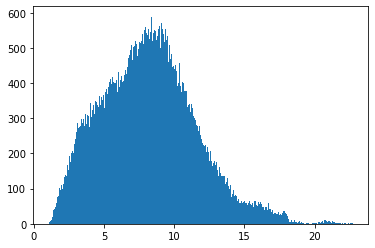

In [114]:
plt.hist(np.sum(np.sqrt(np.square(pcd.points -pcd.get_center())),axis=1),bins=300)

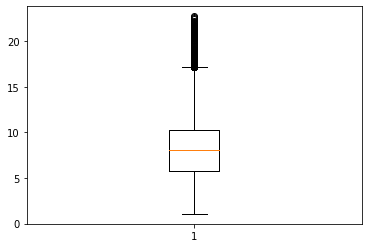

In [70]:
data = plt.boxplot(np.sort(np.sum(np.sqrt(np.square(pcd.points -pcd.get_center())),axis=1)))

In [69]:
data

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae9dbaa6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae9dbb80a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae9dbaa670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae9dbb8700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae9dbaa610>],
 'means': []}

In [37]:
help(pcd.compute_mahalanobis_distance)

Help on method compute_mahalanobis_distance in module open3d.cuda.pybind.geometry:

compute_mahalanobis_distance(...) method of open3d.cuda.pybind.geometry.PointCloud instance
    compute_mahalanobis_distance(self)
    Function to compute the Mahalanobis distance for points in a point cloud. See: https://en.wikipedia.org/wiki/Mahalanobis_distance.
    
    Returns:
        open3d.utility.DoubleVector



In [25]:
cmd[0]

5.694190691611122

In [35]:
cnnd = pcd.compute_nearest_neighbor_distance()

In [34]:
help(pcd.compute_nearest_neighbor_distance)

Help on method compute_nearest_neighbor_distance in module open3d.cuda.pybind.geometry:

compute_nearest_neighbor_distance(...) method of open3d.cuda.pybind.geometry.PointCloud instance
    compute_nearest_neighbor_distance(self)
    Function to compute the distance from a point to its nearest neighbor in the point cloud
    
    Returns:
        open3d.utility.DoubleVector



In [31]:
help(pcd.compute_point_cloud_distance)

Help on method compute_point_cloud_distance in module open3d.cuda.pybind.geometry:

compute_point_cloud_distance(...) method of open3d.cuda.pybind.geometry.PointCloud instance
    compute_point_cloud_distance(self, target)
    For each point in the source point cloud, compute the distance to the target point cloud.
    
    Args:
        target (open3d.geometry.PointCloud): The target point cloud.
    
    Returns:
        open3d.utility.DoubleVector



In [24]:
cnnd[0]

0.3025034534617343

In [27]:
pcd.points[0]-pcd.get_center()

array([ 9.40761895, -2.74272076, -6.06516191])

In [28]:
pcd.points.compute_nearest_neighbor_distance(pcd.get_center())

AttributeError: 'open3d.cuda.pybind.utility.Vector3dVector' object has no attribute 'compute_nearest_neighbor_distance'

In [ ]:
# map_building = glob.glob("map**")
# ins_building = glob.glob("building**")
# """
# for editing the bug
# """
# for i in map_building:
#     area_json = i.split("map_ins_")[-1]
#     os.rename(i,f"building_ins_{area_json}")

# for i,_ in enumerate(map_building):
#     dict = read_meta_data(map_building[i])
#     dict.pop("building")
#     area_json = map_building[i].split("ins_")[-1]
#     building = read_meta_data(f"building_ins_{area_json}")
#     dict["building"]=building
#     os.remove(f"building_ins_{area_json}")
#     os.remove(map_building[i])
#     save_meta_data(area_json[:-5],dict)
area_meta_data_json= glob.glob("T**.json")
for num in range(len(area_meta_data_json)):
    map_ins = read_meta_data(area_meta_data_json[num])
    for k,kd in enumerate(map_ins["building"].keys()):
        path_all_data = map_ins["building"][kd]["path_all_data_txt"]
        print(path_all_data)
        path_all_data_txt = path_all_data[:-4]+".txt"
        print(path_all_data_txt)
        all_data = np.loadtxt(path_all_data)
        np.savetxt(path_all_data_txt,all_data,fmt="%.9f %.9f %.9f %d %d %d")
        # map_ins[id_keys[-1]][kd].pop("path_all_data_txt")
        map_ins["building"][kd]["path_all_data_txt"] = path_all_data_txt
        os.remove(path_all_data)
        
    save_meta_data(area_meta_data_json[0][:-5],map_ins)
    
